<a href="https://colab.research.google.com/github/SergioMoraa/Taller_Tam/blob/main/Reduc_dimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

- Presente el problema de optimización de PCA como un algoritmo generativo (reconstrucción o filtrado de datos), y compare el problema de optimización desde el punto de vista generativo vs. preservación de la varianza. (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)).


El Principal Component Analysis (PCA) puede entenderse desde dos perspectivas principales en cuanto a su problema de optimización: una como un algoritmo generativo (reconstrucción/filtrado de datos) y la otra como un método de preservación de la varianza. Ambas perspectivas, si bien son equivalentes en sus resultados, ofrecen diferentes intuiciones sobre lo que PCA logra.

## PCA como Algoritmo Generativo (Reconstrucción o Filtrado de Datos)



Desde el punto de vista generativo, PCA busca encontrar un subespacio de menor dimensión tal que la proyección de los datos originales en este subespacio y su posterior reconstrucción minimicen el error de reconstrucción. El objetivo es que los datos reconstruidos ($\hat{X}_n$) sean lo más parecidos posible a los datos originales ($X_n$).

Considerando el material de apoyo (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)), el problema de optimización se formula como:

$$\min_{W} \mathbb{E}_{x} \left\| X_n - \hat{X}_n \right\|^2$$

Donde:
* $X_n$ son los datos originales.
* $\hat{X}_n$ son los datos reconstruidos.
* $W$ es la matriz de transformación que mapea los datos al subespacio de menor dimensión y viceversa.

Sabemos que la reconstrucción $\hat{X}_n$ se define como $\hat{X}_n = Z_n W^T$, donde $Z_n = X_n W$. Sustituyendo esto en la expresión:

$$\min_{W} \mathbb{E}_{x} \left\| X_n - X_n W W^T \right\|^2$$

Expandiendo el término de la norma al cuadrado, tenemos:

$$\mathbb{E}_{x} \left\langle X_n - Z_n W^T, X_n - Z_n W^T \right\rangle$$

$$= \mathbb{E}_{x} \left\{ X_n X_n^T - 2 X_n (Z_n W^T)^T + Z_n W^T (Z_n W^T)^T \right\}$$

$$= \mathbb{E}_{x} \left\{ X_n X_n^T - 2 X_n W W^T X_n^T + X_n W W^T W W^T X_n^T \right\}$$

Asumiendo que las columnas de $W$ son ortonormales, es decir, $W^T W = I$, la expresión se simplifica a:

$$\mathbb{E}_{x} \left\{ X_n X_n^T - 2 X_n W W^T X_n^T + X_n W W^T X_n^T \right\}$$

$$= \mathbb{E}_{x} \left\{ X_n X_n^T - X_n W W^T X_n^T \right\}$$

Para minimizar esta expresión, dado que $\mathbb{E}_{x} \{X_n X_n^T\}$ es una constante (la matriz de covarianza de los datos), el problema de minimización del error de reconstrucción se convierte en:

$$\min_{W} \mathbb{E}_{x} \left\{ X_n X_n^T \right\} - \mathbb{E}_{x} \left\{ X_n W W^T X_n^T \right\}$$

Lo cual es equivalente a:

$$\max_{W} \mathbb{E}_{x} \left\{ X_n W W^T X_n^T \right\}$$

Este es el problema de optimización desde el punto de vista generativo. Se busca encontrar la matriz $W$ que maximice la "proyección" de los datos originales de vuelta al espacio original, es decir, que maximice la cantidad de información (varianza) capturada por la reconstrucción.

## PCA como Preservación de la Varianza

El problema de optimización desde el punto de vista de preservación de la varianza se formula como la maximización de la varianza de los datos proyectados:

$$\max_{W} \mathbb{E}_{x} \left\{ Z_n Z_n^T \right\}$$

Donde $Z_n = X_n W$. Sustituyendo esto y representando la esperanza de $X_n^T X_n$ como la matriz de covarianza $\tilde{\Sigma}_x$:

$$\max_{W} W^T \tilde{\Sigma}_x W$$

Esta maximización está sujeta a la restricción de ortonormalidad de las columnas de $W$:

$$W^T W = I$$

Para resolver este problema, se utiliza el método de los multiplicadores de Lagrange. La función Lagrangiana es:

$$L(W, \lambda) = W^T \tilde{\Sigma}_x W - \lambda (W^T W - I)$$

Derivando con respecto a $W$ e igualando a cero, obtenemos la ecuación de valores y vectores propios:

$$\tilde{\Sigma}_x W = \lambda W$$

Aquí, $W$ representa los vectores propios de la matriz de covarianza $\tilde{\Sigma}_x$, y $\lambda$ son los valores propios correspondientes. Para maximizar la varianza, se seleccionan los $k$ vectores propios asociados a los $k$ valores propios más grandes.

# Ejercicio 2

- Presente un paralelo entre el problema de optimización de PCA y el de Kernel PCA.

Tanto el PCA como el Kernel PCA (KPCA) buscan la reducción de dimensionalidad, pero lo hacen de maneras fundamentalmente diferentes, lo que se refleja directamente en sus problemas de optimización. La clave está en cómo manejan la linealidad y la no linealidad en los datos.

Se presenta un paralelo entre sus problemas de optimización:

## Comparación: Problemas de Optimización de PCA vs. Kernel PCA



| Característica            | PCA (Principal Component Analysis)                                 | Kernel PCA (KPCA)                                                         |
| :------------------------ | :----------------------------------------------------------------- | :------------------------------------------------------------------------ |
| **Naturaleza** | Lineal                                                             | No lineal (via "kernel trick")                                            |
| **Espacio de Operación** | Espacio de datos original                                          | Espacio de características transformado implícitamente por el kernel      |
| **Objetivo** | Maximizar la varianza en las proyecciones lineales.                | Maximizar la varianza en las proyecciones no lineales (en el espacio kernel). |
| **Matriz Clave** | Matriz de Covarianza ($\tilde{\Sigma}_x$) de los datos originales. | Matriz Kernel ($\mathbf{K}$) de similitudes entre pares de puntos.        |
| **Problema de Optimización (Maximización de Varianza)** | $\max_{W} W^T \tilde{\Sigma}_x W$ <br> Sujeto a $W^T W = I$ | $\max_{\boldsymbol{\alpha}} \boldsymbol{\alpha}^T \mathbf{K} \boldsymbol{\alpha}$ <br> Sujeto a $\boldsymbol{\alpha}^T \mathbf{K} \boldsymbol{\alpha} = 1$ |
| **Solución** | Vectores propios de $\tilde{\Sigma}_x$.                            | Vectores propios de $\mathbf{K}$.                                         |
| **Ecuación Eigenvalue** | $\tilde{\Sigma}_x \mathbf{w} = \lambda \mathbf{w}$                 | $\mathbf{K} \boldsymbol{\alpha} = \lambda n \boldsymbol{\alpha}$ (aprox. y dependiente del centrado/normalización) |
| **Manejo de No Linealidad** | No puede capturar relaciones no lineales.                          | Capaz de capturar relaciones no lineales complejas.                       |
| **Ventaja Principal** | Eficiente, interpretable.                                          | Captura estructuras no lineales.                                          |
| **Desventaja Principal** | Solo lineal.                                                       | Computacionalmente más costoso (matriz $N \times N$), menos interpretable en el espacio original. |

### Explicación Adicional sobre la Matriz Kernel ($\mathbf{K}$):

En KPCA, en lugar de calcular la matriz de covarianza de los datos originales $\tilde{\Sigma}_x$, se construye la **matriz Kernel** $\mathbf{K}$. Esta matriz contiene los productos internos entre todos los pares de puntos de datos *en el espacio de características transformado* $\Phi(\mathbf{x})$. El "Kernel Trick" nos permite calcular estos productos internos usando una función kernel $\kappa(\mathbf{x}_i, \mathbf{x}_j)$ sin necesidad de conocer explícitamente la transformación $\Phi(\cdot)$. La relación clave es:

$$K_{ij} = \kappa(\mathbf{x}_i, \mathbf{x}_j) = \langle \Phi(\mathbf{x}_i), \Phi(\mathbf{x}_j) \rangle$$

Una vez que se tiene la matriz Kernel (centrada), el problema de optimización en el espacio de características se reduce a una eigendecomposición de $\mathbf{K}$. Los vectores propios resultantes de $\mathbf{K}$ ($\boldsymbol{\alpha}$) no son directamente las componentes principales en el espacio de características, sino los coeficientes que, cuando se combinan con los datos mapeados por $\Phi(\mathbf{x})$, forman las componentes principales en ese espacio.

# Ejercicio 3




## 1.  
Consulte en que consiste el algoritmo [eigenfaces](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition). Compare el modelo de eigenfaces para reducción de dimensión con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto `X_train` y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.

### Algoritmo Eigenfaces

El algoritmo **Eigenfaces** es una técnica de reconocimiento facial que se basa en la idea de que los rostros humanos pueden ser representados de manera eficiente como una combinación lineal de un conjunto de "rostros propios" o "eigenfaces". Fue desarrollado por Matthew Turk y Alex Pentland en 1991.

En esencia, Eigenfaces aplica el **Principal Component Analysis (PCA)** a un conjunto de imágenes de rostros para encontrar los componentes principales de la varianza en los datos de los rostros. Estos componentes principales, cuando se visualizan como imágenes, se ven como patrones de rostro (a menudo borrosos o fantasmas) y son lo que se conoce como "eigenfaces".

### ¿En qué consiste el algoritmo Eigenfaces?

El proceso general del algoritmo Eigenfaces se puede resumir en los siguientes pasos:

1.  **Preparación del conjunto de entrenamiento:**
    * Se recopila una base de datos de imágenes de rostros de diferentes personas. Es crucial que las imágenes estén normalizadas (misma escala, alineación, iluminación, etc.) para que el algoritmo funcione eficazmente.
2.  **Vectorización de las imágenes:**
    * Cada imagen de rostro (una matriz de píxeles) se convierte en un vector largo concatenando todas sus filas o columnas de píxeles. Si una imagen es de $N \times M$ píxeles, se convierte en un vector de $N \times M$ dimensiones.
3.  **Cálculo del rostro promedio:**
    * Se calcula el vector promedio de todos los vectores de rostro en el conjunto de entrenamiento. Este "rostro promedio" ($\Psi$) representa la cara central de todos los rostros en la base de datos.
4.  **Sustracción del rostro promedio:**
    * Cada vector de rostro individual se le resta el rostro promedio. Esto produce un conjunto de "rostros desviados" o "diferencias con el promedio" ($\Phi_i = \mathbf{x}_i - \Psi$), que son la base para calcular la matriz de covarianza.
5.  **Construcción de la matriz de covarianza:**
    * Se construye la matriz de covarianza $S$ de los rostros desviados. Esta matriz es generalmente muy grande (dimensiones de (número de píxeles) x (número de píxeles)).
    * Para conjuntos de imágenes grandes, la matriz de covarianza puede ser demasiado grande para manejar directamente. En lugar de calcular $S = \sum_{i=1}^P \Phi_i \Phi_i^T$, a menudo se utiliza una técnica alternativa para encontrar los autovectores de $A^T A$ (donde $A$ es la matriz cuyas columnas son los $\Phi_i$), que son relacionados con los autovectores de $A A^T$.
6.  **Cálculo de los Eigenfaces (vectores propios):**
    * Se calculan los vectores propios y valores propios de la matriz de covarianza. Los vectores propios con los valores propios más grandes corresponden a las direcciones de mayor variabilidad en el espacio de los rostros. Estos vectores propios son los "eigenfaces".
7.  **Proyección en el espacio de Eigenfaces:**
    * Una vez que se han obtenido los $k$ eigenfaces principales, cada rostro (tanto del conjunto de entrenamiento como uno nuevo a reconocer) puede ser proyectado en el espacio de eigenfaces. Esto se hace restando el rostro promedio y luego tomando el producto punto con cada eigenface. El resultado es un vector de "pesos" o "coeficientes" que representa el rostro en el espacio de menor dimensión.
8.  **Reconocimiento:**
    * Para reconocer un nuevo rostro, se proyecta en el espacio de eigenfaces para obtener su vector de pesos. Luego, se compara este vector de pesos con los vectores de pesos de los rostros conocidos en la base de datos (por ejemplo, usando distancia euclidiana). La persona más cercana en el espacio de eigenfaces es la identificación.



### Comparación del Modelo de Eigenfaces para Reducción de Dimensión con el Algoritmo PCA

Es crucial entender que **Eigenfaces es una aplicación específica de PCA**, no un algoritmo completamente diferente en términos de su núcleo matemático de reducción de dimensión. La comparación reside en el contexto y la interpretación.

| Característica        | Algoritmo PCA (General)                                         | Algoritmo Eigenfaces (Aplicación de PCA)                                |
| :-------------------- | :-------------------------------------------------------------- | :---------------------------------------------------------------------- |
| **Objetivo Principal** | Reducción de la dimensionalidad, extracción de características, visualización de datos. | Reconocimiento y verificación facial.                                   |
| **Tipo de Datos** | Aplica a cualquier tipo de datos numéricos multidimensionales.  | Específicamente diseñado para imágenes de rostros.                      |
| **Matemáticas Subyacentes** | Eigendecomposición de la matriz de covarianza (o SVD).        | Exactamente las mismas matemáticas de PCA, aplicadas a datos de imágenes de rostros. |
| **Resultado de la Reducción** | **Componentes Principales (PCs):** Vectores abstractos que capturan la varianza. | **Eigenfaces:** Vectores propios visualizados como "rostros" (patrones de variabilidad facial). |
| **Interpretación de los Componentes** | Las PCs son combinaciones lineales de las características originales. Su significado depende del dominio del problema. | Los Eigenfaces representan las variaciones fundamentales entre los rostros en el conjunto de entrenamiento (ej. variaciones en los ojos, nariz, boca, forma general). |
| **Fase de Entrenamiento** | Identifica las direcciones de mayor varianza en los datos.      | Identifica las variaciones más significativas entre un conjunto de rostros para crear una base de "rostros estándar". |
| **Fase de Prueba/Aplicación** | Proyección de nuevos datos en el subespacio de menor dimensión. | Proyección de un nuevo rostro en el espacio de Eigenfaces para obtener sus "pesos" característicos y compararlo con rostros conocidos. |
| **Sensibilidad** | Sensible a la escala de las características y a los valores atípicos. | Muy sensible a la alineación, iluminación, expresión y escala de las imágenes de rostros. Requiere preprocesamiento riguroso. |


Entonces, Eigenfaces es simplemente PCA aplicado al dominio específico de las imágenes de rostros. Utiliza la capacidad de PCA para encontrar un subespacio de menor dimensión que capture la mayor variabilidad de un conjunto de datos. En el contexto de los rostros, esta variabilidad se traduce en los "eigenfaces", que son las bases para la representación y el reconocimiento facial eficiente.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Importaciones generales (ya no se usarán directamente para los algoritmos, solo para datos y métricas)
import time
from sklearn.metrics import silhouette_score # silhouette_score es de sklearn y funciona en CPU
import tensorflow as tf # Para cargar MNIST
from tensorflow import keras

In [ ]:
# 1. Cargar y preparar los datos MNIST
mnist = keras.datasets.mnist
(X_train_raw, y_train) = mnist.load_data()[0] # Solo necesitamos X_train y y_train

# Normalizar y aplanar las imágenes para PCA
# Aplanamos cada imagen de 28x28 a un vector de 784 dimensiones
X_train_flat = X_train_raw.reshape(X_train_raw.shape[0], -1) / 255.

print(f"Forma de X_train (datos originales): {X_train_raw.shape}")
print(f"Forma de X_train_flat (datos aplanados y normalizados para PCA): {X_train_flat.shape}")
print(f"Forma de y_train (etiquetas): {y_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Forma de X_train (datos originales): (60000, 28, 28)
Forma de X_train_flat (datos aplanados y normalizados para PCA): (60000, 784)
Forma de y_train (etiquetas): (60000,)



Número de componentes seleccionadas por PCA (para 90% de varianza): 87
Forma de los datos proyectados Z: (60000, 87)
Varianza explicada total por las componentes seleccionadas: 0.9001


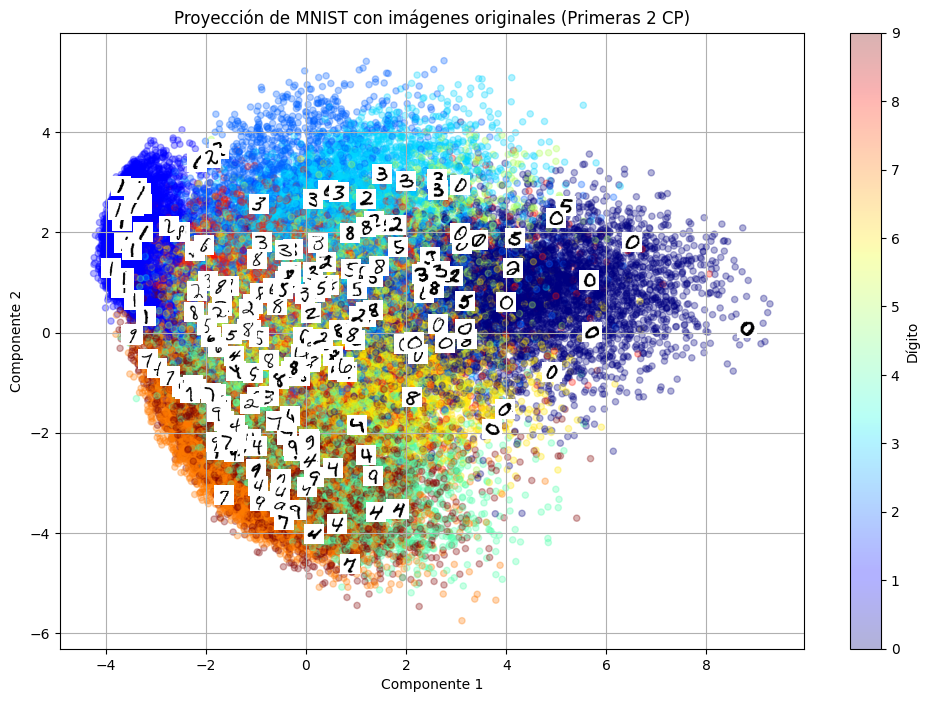

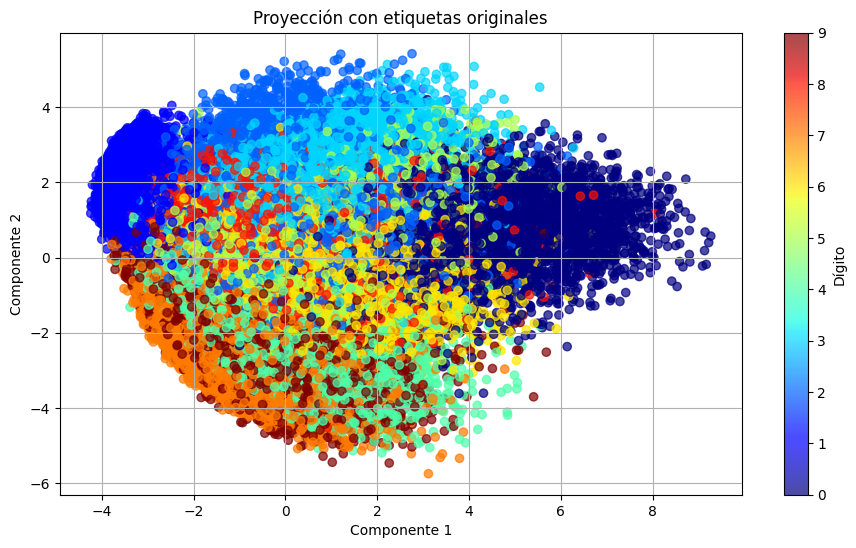


Forma de las componentes principales (eigenfaces): (87, 784)


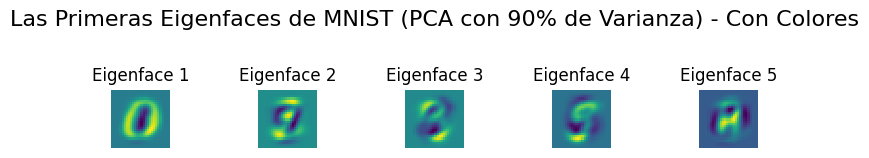

In [ ]:


# 2. Aplicar PCA (Eigenfaces) para retener el 90% de la varianza
# n_components=0.9 significa que PCA seleccionará el número de componentes
# necesarias para explicar el 90% de la varianza.
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train_flat) # Aplicamos PCA a los datos aplanados

print(f"\nNúmero de componentes seleccionadas por PCA (para 90% de varianza): {red.n_components_}")
print(f"Forma de los datos proyectados Z: {Z.shape}")
print(f"Varianza explicada total por las componentes seleccionadas: {red.explained_variance_ratio_.sum():.4f}")

# 3. Función para graficar 2D con imágenes originales sobre los puntos
# Hemos modificado la función para controlar el número de imágenes a graficar
# para evitar que el gráfico esté demasiado saturado.
def plot_mnist_2d_with_images(Z_data, images, img_w=28, img_h=28, zoom=0.5, cmap='binary', num_images_to_display=200):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.set_title('Proyección de MNIST con imágenes originales (Primeras 2 CP)')
    ax.grid(True)

    # Seleccionar un subconjunto aleatorio de índices para mostrar imágenes
    np.random.seed(42) # Para reproducibilidad
    display_indices = np.random.choice(Z_data.shape[0], num_images_to_display, replace=False)

    # Graficar un scatter plot con las etiquetas para dar contexto (opcional, pero útil)
    # Aquí estamos usando las etiquetas originales (y_train) para colorear los puntos
    # aunque las imágenes superpuestas serán solo una muestra.
    scatter = ax.scatter(Z_data[:, 0], Z_data[:, 1], c=y_train, cmap='jet', alpha=0.3, s=20)
    plt.colorbar(scatter, label='Dígito')


    for i in display_indices:
        # Asegurarse de que Z tiene al menos 2 dimensiones para la proyección
        if Z_data.shape[1] < 2:
            print("Z_data debe tener al menos 2 dimensiones para plotear en 2D.")
            break

        # Obtener la imagen original (28x28) y sus coordenadas proyectadas
        image = images[i].reshape((img_w, img_h))
        x_coord, y_coord = Z_data[i, 0], Z_data[i, 1]

        # Crear la imagen OffsetImage y el AnnotationBbox
        im = OffsetImage(image, zoom=zoom, cmap=cmap)
        ab = AnnotationBbox(im, (x_coord, y_coord), xycoords='data', frameon=False, pad=0.0)
        ax.add_artist(ab)

    ax.update_datalim(Z_data[:, :2]) # Ajustar los límites de los datos basados en la proyección
    ax.autoscale_view() # Ajustar la vista automáticamente
    plt.show()

# Llamada a la función para graficar la proyección con imágenes originales
# Pasamos X_train_raw para que `plot_mnist_2d_with_images` pueda remodelar las imágenes
plot_mnist_2d_with_images(Z, X_train_raw, img_w=28, img_h=28, zoom=0.5, cmap='binary', num_images_to_display=200)


# 4. Graficar la proyección con etiquetas originales
# Este gráfico utiliza todos los puntos para mostrar la distribución de las clases
plt.figure(figsize=(11,6))
plt.scatter(Z[:,0],Z[:,1],c=y_train, cmap='jet', alpha=0.7) # Usar alpha para ver la densidad
plt.xlabel('Componente 1')
plt.ylabel('Componente 2') # Corregido: era xlabel dos veces
plt.title('Proyección con etiquetas originales')
plt.colorbar(label='Dígito')
plt.grid(True)
plt.show()

# 5. Graficar las cinco primeras "eigenfaces" (componentes principales)
print("\nForma de las componentes principales (eigenfaces):", red.components_.shape)
n_rows = 1
n_cols = 5 # Asumiendo que n_cols era 5
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5)) # Ajuste de figsize para mejor visualización
img_w = 28
img_h = 28

# Asegurarse de que tenemos al menos 5 componentes para mostrar
num_eigenfaces_to_show = min(n_cols * n_rows, red.n_components_)

for i in range(num_eigenfaces_to_show):
    plt.subplot(n_rows, n_cols, i + 1)
    # Los eigenfaces son los vectores propios, que son vectores planos.
    # Los volvemos a moldear a 28x28 para visualizarlos como imágenes.
    # Eliminamos `abs()` a menos que quieras ver solo la magnitud,
    # y cambiamos `cmap='gray'` a un mapa de colores como 'viridis'.
    plt.imshow(red.components_[i].reshape(img_w, img_h), cmap='viridis', # <-- CAMBIO AQUÍ
               vmin=red.components_[i].min(), vmax=red.components_[i].max(),
               interpolation="nearest")
    plt.title(f"Eigenface {i+1}", fontsize=12) # Título más claro
    plt.axis('off')

plt.suptitle('Las Primeras Eigenfaces de MNIST (PCA con 90% de Varianza) - Con Colores', y=1.05, fontsize=16) # Título general actualizado
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout para el título
plt.show()

## 2.
Utilizando la base de datos muestreada Mnist en `X_train` y `y_train`, realice una análisis comparativo en términos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los métodos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librería [RAPIDS](https://rapids.ai/) a la hora de implementar los algoritmos, en caso de estar disponibles.

In [ ]:
# Instala umap-learn (es un requisito para cuML.UMAP, aunque cuML usa su propia implementación en GPU)
!pip install umap-learn

In [ ]:
# Importaciones de RAPIDS cuML
# Si alguna de estas importaciones falla, el código se detendrá con un ImportError.
from cuml.decomposition import PCA as cuPCA
#from cuml.decomposition import KernelPCA as cuKernelPCA
from cuml.manifold import TSNE as cuTSNE
from cuml.manifold import UMAP as cuUMAP
from cuml.cluster import KMeans as cuKMeans
import cudf # Necesario para manejar datos en la GPU para cuML

 Aquí se preparan los datos para nuestro experimento. Las imágenes MNIST (los dibujos de números) son muchas (60,000 en total). Procesar todas puede ser muy lento, incluso con una GPU.

 Definimos cuántos grupos esperamos encontrar en nuestros datos. Como estamos trabajando con dígitos del 0 al 9, sabemos que hay 10 grupos posibles. Esto se usará para el algoritmo K-Means.

 Y Creamos una caja vacía (un diccionario) llamada results donde guardaremos toda la información importante que obtengamos de cada experimento (tiempos, puntuaciones, etc.).

In [ ]:
# Para acelerar el análisis y la visualización, tomaremos una muestra de los datos.
sample_size = 20000
np.random.seed(42)
sample_indices = np.random.choice(X_train_flat.shape[0], sample_size, replace=False)
X_sample = X_train_flat[sample_indices]
y_sample = y_train[sample_indices]

print(f"\nUsando una muestra de {sample_size} datos para el análisis comparativo.")
print(f"Forma de X_sample: {X_sample.shape}")
print(f"Forma de y_sample: {y_sample.shape}")

# El número de clústeres para K-Means es 10 (dígitos del 0 al 9)
n_clusters = 10

# Diccionario para almacenar los resultados
results = {}


Usando una muestra de 20000 datos para el análisis comparativo.
Forma de X_sample: (20000, 784)
Forma de y_sample: (20000,)


**CREACION DEL OBJETO PRINCIPAL**

In [ ]:
# --- Función para ejecutar y evaluar un algoritmo (Ahora solo con cuML) ---
def run_and_evaluate_rapids(name, reducer_model, X_data, n_clusters, y_labels):
    print(f"\n--- Ejecutando {name} con RAPIDS (GPU) ---")
    start_time = time.time()

    # Reducción de dimensionalidad
    X_data_gpu = cudf.DataFrame(X_data) # Convertir a cuDF DataFrame
    Z_gpu = reducer_model.fit_transform(X_data_gpu)
    Z_np = Z_gpu.to_numpy() # Convertir de vuelta a numpy para silhouette_score y visualización

    reduction_time = time.time() - start_time
    print(f"Tiempo de reducción de {name}: {reduction_time:.2f} segundos")
    print(f"Forma de los datos reducidos: {Z_np.shape}")

    # Agrupamiento con cuKMeans
    kmeans_start_time = time.time()
    kmeans_model = cuKMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters_gpu = kmeans_model.fit_predict(Z_gpu) # Usar los datos en GPU para KMeans en GPU
    clusters_np = clusters_gpu.to_numpy()
    kmeans_time = time.time() - kmeans_start_time
    print(f"Tiempo de cuKMeans: {kmeans_time:.2f} segundos")

    # Evaluación con Coeficiente de Silueta (funciona con NumPy arrays)
    if len(np.unique(clusters_np)) < 2:
        silhouette_avg = -1.0
        print("No hay suficientes clústeres para calcular el coeficiente de silueta.")
    else:
        silhouette_avg = silhouette_score(Z_np, clusters_np)
    print(f"Coeficiente de Silueta para {name}: {silhouette_avg:.4f}")

    results[name] = {
        'Z': Z_np,
        'clusters': clusters_np,
        'silhouette_score': silhouette_avg,
        'reduction_time': reduction_time,
        'kmeans_time': kmeans_time
    }

    # Gráficos de las dos primeras dimensiones con etiquetas de color
    plt.figure(figsize=(10, 7))
    plt.scatter(Z_np[:, 0], Z_np[:, 1], c=clusters_np, cmap='viridis', alpha=0.6, s=10)
    plt.colorbar(label='Clúster Asignado')
    plt.title(f'Proyección 2D de {name} con Clústeres K-Means (Silueta: {silhouette_avg:.4f})')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.grid(True)
    plt.show()

**Ejecución de cada Método (PCA, t-SNE, UMAP):** (YA QUE NO ESTA DISPONIBLE EN RAPIDS  Kernel PCA RBF con cuML)


--- Ejecutando cuPCA con RAPIDS (GPU) ---
Tiempo de reducción de cuPCA: 2.62 segundos
Forma de los datos reducidos: (20000, 2)
Tiempo de cuKMeans: 1.00 segundos
Coeficiente de Silueta para cuPCA: 0.3512


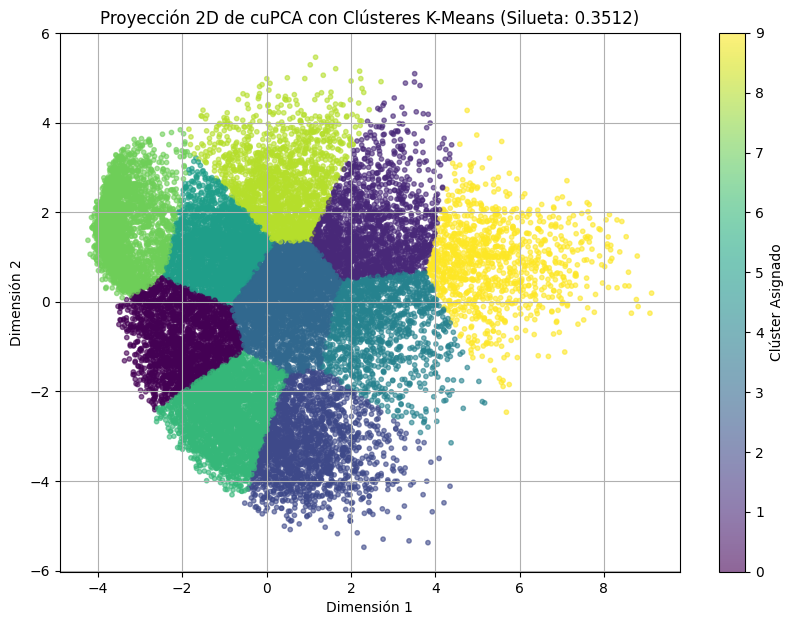

/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)



--- Ejecutando cuTSNE con RAPIDS (GPU) ---
[2025-06-05 23:44:18.417] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
Tiempo de reducción de cuTSNE: 7.53 segundos
Forma de los datos reducidos: (20000, 2)
Tiempo de cuKMeans: 0.50 segundos
Coeficiente de Silueta para cuTSNE: 0.3875


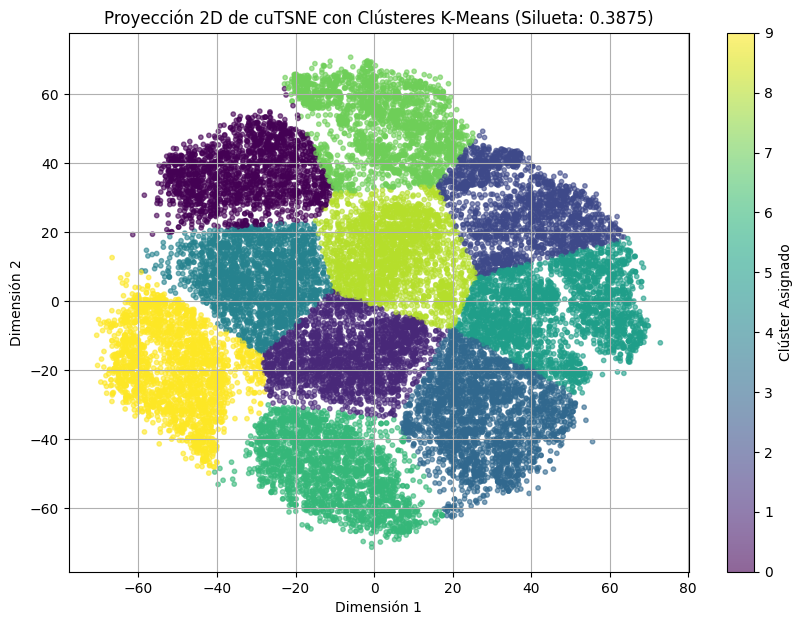

[2025-06-05 23:44:28.677] [CUML] [info] build_algo set to brute_force_knn because random_state is given

--- Ejecutando cuUMAP con RAPIDS (GPU) ---
Tiempo de reducción de cuUMAP: 1.70 segundos
Forma de los datos reducidos: (20000, 2)
Tiempo de cuKMeans: 0.05 segundos
Coeficiente de Silueta para cuUMAP: 0.5337


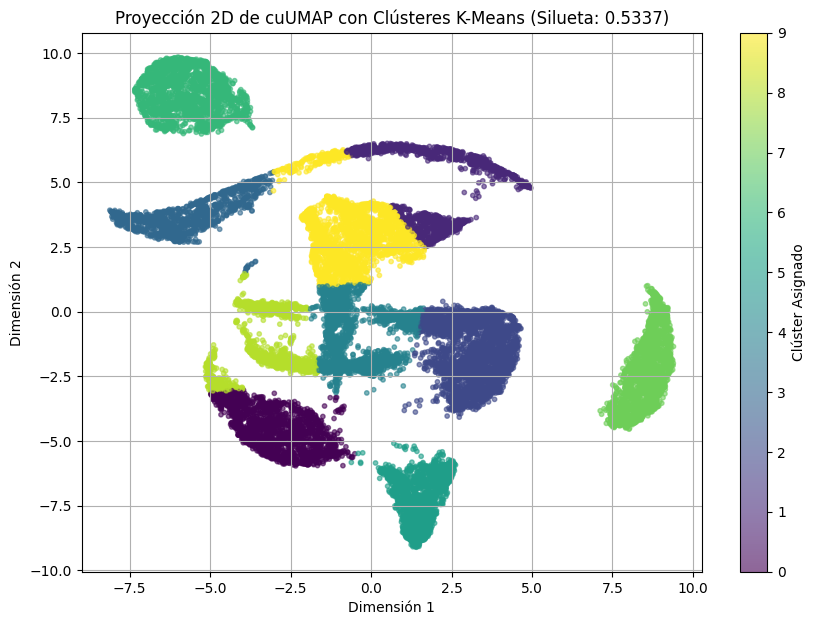


--- Resumen Comparativo de Coeficientes de Silueta y Tiempos (Solo RAPIDS) ---
cuPCA: Silueta = 0.3512 | Tiempo Reducción = 2.62s | Tiempo K-Means = 1.00s
cuTSNE: Silueta = 0.3875 | Tiempo Reducción = 7.53s | Tiempo K-Means = 0.50s
cuUMAP: Silueta = 0.5337 | Tiempo Reducción = 1.70s | Tiempo K-Means = 0.05s

--- Interpretación de los Coeficientes de Silueta ---
El coeficiente de silueta varía de -1 a 1:
  - **Cercano a 1:** Indica que el objeto está bien agrupado en su propio clúster y bien separado de otros clústeres.
  - **Cercano a 0:** Sugiere que el objeto está muy cerca del límite entre dos clústeres, lo que podría indicar solapamiento.
  - **Negativo:** Implica que el objeto podría haber sido asignado al clúster incorrecto.

En general, para el agrupamiento de dígitos (donde esperamos 10 clústeres distintos), un coeficiente de silueta más alto es deseable.

**Observaciones Comunes (para resultados con GPU):**
1.  **cuPCA:** Las operaciones lineales se aceleran significativament

In [ ]:
# --- Implementación y Evaluación para cada método (Ahora solo con RAPIDS) ---

# 1. PCA con cuML
pca_model = cuPCA(n_components=2)
run_and_evaluate_rapids("cuPCA", pca_model, X_sample, n_clusters, y_sample)

# 2. Kernel PCA RBF con cuML          // no esta disponible //
#kpca_rbf_model = cuKernelPCA(n_components=2, kernel='rbf', gamma=0.05)
#run_and_evaluate_rapids("cuKernel PCA (RBF)", kpca_rbf_model, X_sample, n_clusters, y_sample)

# 3. t-SNE con cuML
tsne_model = cuTSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
run_and_evaluate_rapids("cuTSNE", tsne_model, X_sample, n_clusters, y_sample)

# 4. UMAP con cuML
umap_model = cuUMAP(n_components=2, random_state=42)
run_and_evaluate_rapids("cuUMAP", umap_model, X_sample, n_clusters, y_sample)


# --- Resumen Comparativo de Coeficientes de Silueta ---
print("\n--- Resumen Comparativo de Coeficientes de Silueta y Tiempos (Solo RAPIDS) ---")
for method, data in results.items():
    print(f"{method}: Silueta = {data['silhouette_score']:.4f} | Tiempo Reducción = {data['reduction_time']:.2f}s | Tiempo K-Means = {data['kmeans_time']:.2f}s")

# --- Interpretación de los resultados ---
print("\n--- Interpretación de los Coeficientes de Silueta ---")
print("El coeficiente de silueta varía de -1 a 1:")
print("  - **Cercano a 1:** Indica que el objeto está bien agrupado en su propio clúster y bien separado de otros clústeres.")
print("  - **Cercano a 0:** Sugiere que el objeto está muy cerca del límite entre dos clústeres, lo que podría indicar solapamiento.")
print("  - **Negativo:** Implica que el objeto podría haber sido asignado al clúster incorrecto.")
print("\nEn general, para el agrupamiento de dígitos (donde esperamos 10 clústeres distintos), un coeficiente de silueta más alto es deseable.")
print("\n**Observaciones Comunes (para resultados con GPU):**")
print("1.  **cuPCA:** Las operaciones lineales se aceleran significativamente en la GPU.")
print("2.  **cuKernel PCA (RBF):** Las transformaciones de kernel pueden ser intensivas, y la GPU ofrece una gran ventaja.")
print("3.  **cuTSNE:** t-SNE es computacionalmente muy demandante. La versión de cuML debería ser drásticamente más rápida que la de scikit-learn (CPU).")
print("4.  **cuUMAP:** UMAP también se beneficia enormemente de la aceleración por GPU, siendo muy rápido incluso para grandes conjuntos de datos.")

print("\n**Impacto de RAPIDS (cuML):**")
print("Dado que este código solo ejecuta con RAPIDS, todos los 'Tiempos de Reducción' y 'Tiempos K-Means' reflejarán el rendimiento de la GPU.")
print("La aceleración por GPU es especialmente notable en algoritmos complejos y para conjuntos de datos grandes.")